# Notebook 3: Linear Regression (Diabetes)

## Learning Goal  
The goal of this notebook is to get hands-on experience and intuition about linear regression and regularization. We once again emphasize the difference between fitting and predicting. We will see that it is much more difficult to get good out-of-sample performance on a test set (predicting) than it is to get good in-sample performance on the training set (fitting).

## Overview:

In Notebook 1: __Section II: Machine Learning is difficult__, we explored linear regression in the context of a prediction problem. In this notebook, we'll formally introduce the notion of regression and see how learning and prediction can be improved by introducing regularization. We will focus mainly on simple applications of linear regression: minimizing the mean-square-error (MSE) on the training data (i.e. in-sample error) and see how well we perform on the test data (i.e. out-of-sample error). 


As we discussed in Sec. II of the review, there is a fundamental difference between minimizing the in-sample error and minimizing the out-of-sample error. The underlying reason for this is that the training data may not be representative of the full data distribution. From a Bayesian point of view, as [David MacKay](http://www.inference.org.uk/mackay/) likes to repeat: <i>We can't make predictions without making assumptions.</i> Thus, it is sensible to introduce priors that reflect the fact that we are likely to be undersampled (especially in high dimensions).

We'll consider ordinary least squares regression problem in which the "error function" is defined as the square from the deviation of our linear predictor to the true response. We will supplement this error function with a regularizer that prevents overfitting. From a Bayesian point of view, the regularization can be thought of as a prior on parameters, see Sec VI.
Minimizing the combined in-sample error + regularization terms is the same as the <b> Maximum a posteriori probability (MAP)</b> estimate in Bayesian regression (the parameters at which the posterior probability distribution is peaked). Note that in a true Bayesian approach, we should not use the mode of the posterior but the average over all possible choices of parameters weighted by their posterior probability. In practice, this is  often not done (for computational and practical reasons).



## Least squares linear regression: 

Consider data of the form $(y_i,\mathbf{x}^{(i)})$ where the index $i=1\ldots n$ runs over the number of examples in the training data and $\mathbf{x}^{(i)}$ is a $p$-dimensional feature (row) vector. For notational convenience, it is useful to define the $n \times p$ <b>design matrix</b> $X$ whose rows, $\textbf{x}^{(1)},\cdots, \textbf{x}^{(n)}$, are the examples and columns, $\mathbf{X}_{:,1},\cdots, \mathbf{X}_{:,p}$,  are the measured "features" (i.e. feature predictors). We also denote the $n$-dimensional column vector of sample $i$ as $\mathbf{y}_i$ and the $p$-dimensional column vector of regression parameters $\mathbf{w}\in\mathbb{R}^p$.

For ordinary least square regression (no regularization), we minimize the square loss cost function:

$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\textbf{Xw}-\textbf{y}||_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} \,(\mathbf{Xw}-\mathbf{y})^T(\mathbf{Xw}-\mathbf{y}),
$$

or equivalently, in component form,
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}}   \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}^{(i)})^2.
$$

If rank$(\mathbf{X})=p$, namely, the feature predictors $\mathbf{X}_{:,1},\cdots \mathbf{X}_{:,p}$ are linearly independent, then there exists unique solution to this problem:

$$
\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}
$$

### Exercise 1: ###  
<ul>


<li> This choice of parameters correspond the maximum likehood estimate of which Likelihood function? 

<li> Derive $\hat{\textbf{w}}$ explicitly by solving the least square problem defined above.


<li> Is $\hat{\textbf{w}}$ a biased or an unbiased estimator? In other words, does it give the correct answer as the number of data points goes to infinity ($n \rightarrow \infty$). To answer this question, you may assume i.i.d. (independent, identically distributed) samples $(y_i,\textbf{x}^{(i)})$.

<li> Is $\hat{\textbf{w}}$ still well-defined when rank$(\mathbf{X})<p$? This happens when, for example, $n<p$. 

<li> Now imagine the samples are generated in the following manner: $y_i=\textbf{w}_\text{true}\cdot \textbf{x}^{(i)}+\epsilon_i$ where $\epsilon_i\sim\mathcal{N}(0,\sigma^2)$ are i.i.d. Gaussian errors. In statistics, the in-sample risk is defined as
$$
R(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$
where $\mathbb{E}[\cdots]$ is taken over all i.i.d pairs $(y_i,\textbf{x}^{(i)})$ and $\hat{\textbf{w}}$ is the least squares solution given above. Assuming that $\mathbf{X}$ and $\epsilon_i$ are independent, show that the risk is given by

$$
R(\hat{\textbf{w}}, \textbf{w}_\text{true}) = \sigma^2\frac{p}{n}
$$
What's the implication of this for fixed $p$ as $n \rightarrow \infty$? How about when $p,n$ scale together?

</ul>


$\textbf{____________________________________________________________________________________________________________}$
### Exercise 1 Responses:

(1) The least square regression corresponds to a gaussian likelihood function $\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\Sigma\frac{(y_{i}-\mathbf{w} \cdot\mathbf{x}^{(i)})^{2}}{2\sigma^{2}}}$. 

(2) Derive $\mathbf{\hat{w}}$ by minimizing the least-square function:
$\nabla_{w}\left[(y-\mathbf{X}\cdot\mathbf{w})^{T}(y-\mathbf{X}\cdot\mathbf{w})\right]$
$=\nabla_{w}\left[y^{T}y - 2\mathbf{w}^{T}\mathbf{X}^{T}y + 2\mathbf{w}^{T}\mathbf{X}^{T}\mathbf{X}\mathbf{w}\right]$
$= -2\mathbf{X}^{T}y + 2\mathbf{X}^{T}\mathbf{X}\mathbf{w} = 0$

(3) $\hat{\mathbf{w}}$ is an unbiased estimator; it will approach the correct $\mathbf{y}$ as the number of data points goes to infinity (unlike with Ridge Regression). 

And solve for $\mathbf{\hat{w}} = \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}y$


(4) When rank$(\mathbf{X}) < p$, $\mathbf{\hat{w}}$ is still defined but it is no longer a unique solution. Specifically, we can now add any $\mathbf{\eta}\in\text{kernel}(\mathbf{X})$ to $\mathbf{\hat{w}}$ and the equation will still hold.


(5) The risk is defined as
$$R(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2]$$
Plugging in for $\mathbf{\hat{w}}$ and $\mathbf{Xw_{true}}$, we rewrite as:
$$
R = \frac{1}{n}\mathbb{E}[\left((\mathbf{P_{x}} - \mathbf{I})y + \epsilon\right)^{2}]
$$
Recognizing that the noise is independent, and that $(\mathbf{P_{x}} - \mathbf{I})y$ is the residues of $\mathbf{y}$ in the training data space, we write:
$$ R = \frac{1}{n}\left(\mathbb{E}[res(\mathbf{y})^{2}]+\mathbb{E}[\epsilon^{2}]\right)$$
The first expectation value is zero, and the second is the sum of p independent second moments of epsilon, which is the variance $\sigma^{2}$. So we get
$$ R = \frac{p}{n}\sigma^{2} $$

This has the implication that as $n$ gets large for fixed $p$, the Risk will go to zero. When $p$ and $n$ scale together, the risk is dominated by the noise. 

$\textbf{____________________________________________________________________________________________________________}$



From Exercise 1, it is clear that the uniqueness of the solution is only guaranteed when rank$(\mathbf{X})>p$. But even so we still may not want to use least squares if $p$ is moderately close to $n$, because its "risk" could be quite poor. One way to deal with this is to  <i> regularize</i>.

We will be concerned with two classes of regularizers: <b> L2-regularization</b> which is often called <b> Ridge-Regression</b> (or <b>Tikhonov regression</b>) and <b> L1-regularization</b> which goes under the name <b>LASSO</b> (and is closely related to <b>Compressed Sensing</b>).


## Ridge Regression
In Ridge-Regression, the regularization penalty is taken to be the L2-norm of the parameters
$$
E_{ridge}= \lambda ||\textbf{w}||_2^2 = \lambda \textbf{w}^T \textbf{w}=\lambda \sum_{\gamma=1}^p w_\gamma w_\gamma.
$$

Thus, the model is fit by minimizing the sum of the in-sample error and the regularization term
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$
Notice that the parameter $\lambda$ controls how much we weigh the fit and regularization term.

### Exercise 2: ###  
<ul>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?
<li>Show that the solution to Ridge regression is given by $\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$. 
<li>Express your answer in terms of the Singular Value Decomposition of $\mathbf{X}$.
</ul>

$\textbf{____________________________________________________________________________________________________________}$
### Exercise 2 Responses:

(1) Ridge regression corresponds to using a gaussian prior in the MAP estimate. 

(2) Similar to the least squares derivation, now the second to last line after taking the gradient will be
$$ \mathbf{X}\mathbf{y}+\mathbf{X}^{T}\mathbf{X}\mathbf{w}+\lambda\mathbf{w} = 0$$
which yields the solution
$$\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$$.

(3) Using the singular value decomposition $\mathbf{X} = \mathbf{UDV}^{T}$ and straightforward plugging into the above:
$$\mathbf{w}_{ridge}=\mathbf{V}\left(\mathbf{D}^{2}+\lambda\mathbf{I}\right)^{-1}\mathbf{D}\mathbf{U}^{T}\mathbf{y}$$
$\textbf{____________________________________________________________________________________________________________}$

## LASSO ##

We will also be interested in the case where the penalty is the L1-norm of the parameters (sum of absolute values of parameters). This is called LASSO.
$$
E_{LASSO}= \lambda ||\mathbf{w}||_1 = \lambda \sum_{\gamma=1}^p |w_\gamma| .
$$
In this case, 
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2n} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1.
$$
Note the prefactor $1/(2n)$ in the loss function is not essential to this formulation. We have chosen this form to be consistent with the Scikit-Learn package in Python. As we discussed in the main text, LASSO tends to give sparse solution. In the following we're going to explore these ideas a little bit more.


### Exercise 3: ###  
<ul>
<li>What choice of prior does this correspond to if we are performing a MAP estimate?
<li>In this case, can you derive an analytic expression for $\mathbf{w}_{LASSO}$? Do you have any ideas about how we might be able to efficiently numerically calculate this? 
<li> Do you think LASSO and Ridge Regression will give qualitatively different answers? (Consider the limits $\lambda=0$ and $\lambda = \infty$)
</ul>

$\textbf{____________________________________________________________________________________________________________}$
### Exercise 3 Responses:

(1) The LASSO regularizer corresponds to using a Laplace prior in the MAP estimate. 

(2) We can't derive an analytic expression for the weights in LASSO. However, making use of the fact that LASSO is convex, we can use gradient descent methods to find a minimum and then (due to the convexity) that minimum must be a global minimum. 

(3) LASSO and Ridge regression will give different answers. The LASSO regularizer enforces that the weights be sparser than with ridge regression, which you can see in the parameter space. In the $\lambda=0$ limit, there is no regularizer and both have the same performance. As $\lambda$ increased, the contraint imposed by LASSO is $||w||_{1} < t$ while for ridge regression it is $||w||_{2} < t$. Thus LASSO imposes a harsher penalty and for the same $\lambda$ can make improve a model over ridge, depending on our parameters. 

$\textbf{____________________________________________________________________________________________________________}$

## Numerical Experiments with Ridge Regression and LASSO##

We will now perform some numerical experiments with the Diabetes Dataset trying to predict diabetes outcomes one year forward. More information about this data set can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes">https://archive.ics.uci.edu/ml/datasets/Diabetes</a>. This dataset was described in the famous <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf">Least Angle Regression</a> paper by Efron, Hastie, Johnstone, Tibshirani as follows:
<blockquote>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the
response of interest, a quantitative measure of disease progression one year after baseline.</blockquote>


We start by plotting the weights for each value of $\lambda$ for Ridge Regression and LASSO. This is called a regularization path. We also compare the in-sample and out-of-sample performance between two regressions by examining the $R^2$ coefficient of determination (for detailed definition see <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">here</a>). In terms of linear regression, $R^2$ tells us how well the regression function fits the data. The best attainable fit corresponds to $R^2=1$.


In [27]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
import random as rand
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()

Automatically created module for IPython interactive environment


In [2]:
# Chooose paths
alphas = np.logspace(-4, 2, 15)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 200
n_samples_train = 150
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]

train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()

In [3]:
# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))

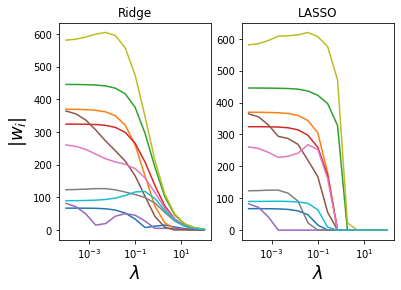

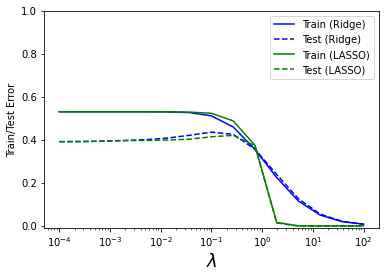

In [4]:
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Train/Test Error')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

### Exercise 4: ###  
<ul>
<li>What do the points $\lambda=0$ and $\lambda=10^5$ correspond to? Is it strange that the weights are not monotonic in $\alpha$? Why do you think this might be?
<li>Make a similar regularization plot for LASSO? 
<li> What is the qualitative difference between the LASSO path and Ridge Path? Does this agree with your earlier predictions? Can you make some qualitative argument to rationalize this difference?
<li>How do your answers change when you vary the number of examples and training set size?
</ul>

$\textbf{____________________________________________________________________________________________________________}$
### Exercise 4 Responses:

(1) $\lambda=0$ corresponds to no regularizer being used, while a value like $\lambda=10^{5}$ would correspond to a massive constraint on the parameters. The eigenvalues-squared of the SVD would have to exceed $\lambda$ to be relevant, and so such a large $\lambda$ value effectively imposes all weights to go to zero. Some weights are not monotonic in $\alpha$, because as the regularizer shuts off certain weights more magnitude is thrown into the other ones, causing a small increase despite $\alpha$ increasing.

(2) LASSO plot next to ridge regression plot.

(3) In ridge regression the weights smoothly descend towards zero as $\alpha$ is increased. For LASSO, it is a much sharper decline and happens for smaller $\alpha$ than with ridge. This is in line with what we were saying earlier about LASSO enforcing a harsher penalty that ridge. 

(4) The values of the weights change, as does how and at what point they are cut off to zero (especially visible in LASSO). Taking extremes like 10 (out of 150) training data points and 140, there is a clear difference. Of course the error also spikes as we decrease the number of data points, and it requires a larger value of $\alpha$ to bring the error down to zero. 
$\textbf{____________________________________________________________________________________________________________}$


## A brief note about convexity##

In Sec. VI of the review, we briefly discussed convexity. Here's a quick refresher: Recall that a set $C\subseteq\mathbb{R}^n$ is called <i> convex </i> if any $x,y\in C$ and $t\in [0,1]$, 
$$
tx+(1-t)y \in C.
$$
In other words, every line segments joining $x,y$ lies entirely in $C$. 

A function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ is called <i> convex </i> if its domain dom$(f)$ is a convex set and for any $x,y\in$dom$(f)$ and $t\in [0,1]$, 

$$
f(tx+(1-t)y)\le tf(x)+(1-t)f(y).
$$
In other words, the function lies below the line segment joining $f(x)$ and $f(y)$. This function $f$ is called <b> strictly convex </b> if this inequality holds strictly for $x\neq y$ and $t\in(0,1)$. 

Why is convexity important?  <b> For convex functions, any local minimizer is a global minimizer</b>. Algorithmically, this means that in the minimization (optimization) procedure, as long as we're "going down the hill" and agree to stop when we can't go any further, then we've hit the global minimum. In addition to this, there's a menagerie of beautiful theory regarding convex duality and optimality, which gives us a way of understanding the solutions even before solving the problem itself. We refer interested readers to  <a href="http://web.stanford.edu/~boyd/cvxbook/">Boyd and Vandenberghe book on Convex Optimization</a>.


Coming back to our regularization examples, a simple inspection reveals that both LASSO and Ridge regression are convex in $w$. What's more, Ridge is actually a <i> strictly convex </i> problem (assuming $\lambda>0$) due to presence of L2 penality. In fact, this is always true regardless of $X$ and so the ridge regression solution you worked out (presumably) in Exercise 2 is always well-defined.

In contrast, LASSO is not always strictly convex and hence by convexity
theory, it need not have a unique solution. The LASSO solution is unique under general conditions, for example, when $X$ has columns in <i> general position </i> (see <a href="https://arxiv.org/abs/1206.0313"> Tibshirani 2013</a>). To mitigate this, one can define a modified problem called the <a href="https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf">elastic net</a> such that the function we want to minimize is always strictly convex:

$$
\underset{\mathbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 + \delta||\mathbf{w}||_2^2,
$$
where $\lambda,\delta\ge 0$ are regularization parameters. Now aside from uniqueness of the solution, the elastic net combines some of the desirable properties (e.g. prediction) of ridge regression with the sparsity properties of the LASSO. In the following exercise, you're going to explore a little bit about elastic net.

### Exercise 4: ###  
<ul>
<li> Play with the parameters $\lambda$ and $\delta$, when would you expect sparse solutions?

<li> Plot the regularization path of elastic net. How does it depend on $\lambda$ and $\delta$?

<li> Derive the analytic solution of this elastic net problem. Check your answer by looking at two limiting cases ($\lambda\rightarrow 0$ and $\delta\rightarrow 0$). Does this agree with what you found previously?

</ul>

$\textbf{____________________________________________________________________________________________________________}$

### Responses:
(1) We can use the ElasticNet model in linear_model to play with parameters $\lambda$ and $\delta$. We'd expect space solutions when $\lambda$ is large, as this is like the 'LASSO part' of the regularizer. 

(2) See plots below

(3) Since there is an L1 norm in the elasticnet regularizer, there is no closed form analytic solution. $\textbf{____________________________________________________________________________________________________________}$


In [40]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

## Set up elastic net model, note alpha = a+b, l1_ratio=a/(a+b)
elasticnet = linear_model.ElasticNet()

Automatically created module for IPython interactive environment


In [84]:
## Set up parameters
a = np.logspace(-2, 2, 20)
b = np.logspace(-2, 2, 20)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 200
n_samples_train = 150
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]

train_errors_enet = [ [0]*len(a) for i in range(len(a))]
test_errors_enet = [ [0]*len(a) for i in range(len(a))]

In [85]:
# Initialize coeffficients for ridge regression and Lasso

coefs_enet = [ [0]*len(a) for i in range(len(a))]
for al in range(len(a)):
    for i in range(len(a)):
        for j in range(len(a)):
            aa = a[i]
            bb = b[j]
            elasticnet.set_params(alpha=aa+bb, l1_ratio=aa/(aa+bb))
            elasticnet.fit(X_train, y_train)
            coefs_enet[i][j] = elasticnet.coef_

            # Use the coefficient of determination R^2 as the performance of prediction.
            train_errors_enet[i][j] = elasticnet.score(X_train, y_train)
            test_errors_enet[i][j] = elasticnet.score(X_test, y_test)

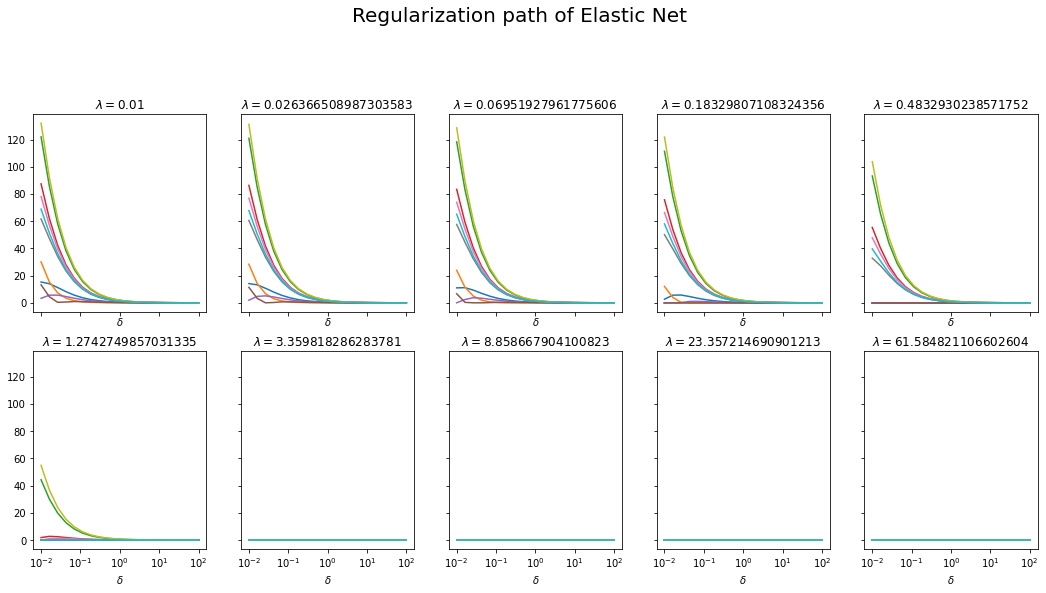

In [93]:
## Alot we can do here, plot 3D colormap of weights vs lambda and delta?
from matplotlib import cm

fig, axs = plt.subplots(2,5, sharex=True, sharey=True)
fig.set_figwidth(18)
fig.set_figheight(8)

for j in range(10):
    if j < 5:
        i = 0
        k=j
    else:
        i = 1
        k = j-5
    axs[i][k].semilogx(a, np.abs(coefs_enet[2*j][:]))
    axs[i][k].set_title(fr'$\lambda={a[2*j]}$')
    axs[i][k].set_xlabel(r'$\delta$')
    axs[i][k].set_xticks([.01,.1,1,10,100])


    
tit=fig.text(0.5, 1.05, r'Regularization path of Elastic Net', ha='center', va='center', fontsize=20)


Above, we plot the regularization paths of Elastic Net. Each plot shows a different $\lambda$ value, which is the L1 regularizer. In each plot, we vary $\delta$, which is the L2 regularizer. 

### End-of-notebook questions ###  
<ul>

<li> Can you explain the difference between in-sample and out-of-sample performance? Is out-of-sample error usually larger than in-sample error? Does this depend on regularization? Recall in Exercise 1, we defined the in-sample risk as 

$$
R_{in}(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$ 
where $\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}$ is the least square solution and $\textbf{w}_\text{true}$ is the true parameter vector used to generate all samples. Following the same notation and assumption, now imagine if we're given a new data point $\textbf{x}_0$ independently drawn from the predictor distribution $\mathcal{P}$. We can define the out-of-sample risk as 
$$
R_{out} =\mathbb{E}_{\textbf{x}^{(0)}\sim\mathcal{P}}\mathbb{E}_{(y_i,\textbf{x}_i)}[(\hat{\textbf{w}}\cdot \textbf{x}_0 -\textbf{w}_\text{true}\cdot \textbf{x}_0)^2],
$$
with the expectation value taken not only over the training samples $(y_i,\textbf{x}_i)$ but also over the predictor distribution $\mathcal{P}$ that generates the unseen sample $\textbf{x}^{(0)}$. One can actually show that $R_{out}\ge R_{in}$ under mild assumptions. This makes sense intuitively since it's usually harder to make prediction on unseen samples than to fit the samples given. You can numerically verify this by assuming a predictor distribution, say, $\mathcal{N}(0,\Sigma)$.
</ul>

### Response

Out of sample error is usually larger than in sample error, and this is a result of the fitting vs. predicting paradigm. If our model gets too good at fitting, it will perform poorly on out of sample data. We would like the model to do slightly worse on the training data so that it will ideally do better when introduced to new data. 